turbulence - stable release version 1.1.1 (11 January 2022)

In [1]:
"""
instantiate the isotropic cube.

parameters:
    - cube_title: name of the turbulence dataset.
    
output:
    - cube: instantiated isotropic cube.
"""
from giverny.isotropic_cube import *

# user-defined parameters for instantiating the isotropic cube.
# -----
# turbulence dataset name, e.g. "isotropic8192" or "isotropic1024fine".
cube_title = 'isotropic8192'

# -----
# generates the morton cube representing the turbulence dataset.
cube = iso_cube(cube_title = cube_title)

In [4]:
"""
process the data.

steps:
    - step 1: identify the database files to be read.
    - step 2: map the voxels (8 x 8 x 8 boxes) in each database file that are inside the user-specified box.
    - step 3: read the files and store the data in a matrix.
    - step 4: write the matrix to a HDF5 file.
    
parameters:
    - output_path: sub-folder, for saving the output files to, in the "scratch" folder of the "Temporary" directory of 
                   the user's SciServer container.
    - x_range, y_range, z_range: axes ranges.
    - x_stride, y_stride, z_stride: axes strides.
    - variable: type of data, e.g. "velocity" or "pressure".
    - timepoint: time point.
    
output:
    - cutout_data: matrix corresponding to variable at timepoint in x_range, y_range, z_range.
"""
from giverny.turbulence_toolkit import *
from giverny.turbulence_gizmos.basic_gizmos import *

# user-defined parameters for processing data.
# -----
# absolute filepath to the folder where all output files will be saved to. the parent directory should be the "scratch" folder in 
# the "Temporary" directory of the user's container. the folder will be created if necessary. note: probably only need to 
# replace "mschnau1" with your SciServer username.
output_path = '/home/idies/workspace/Temporary/mschnau1/scratch/turbulence_output'

# box for which data values will be retrieved for each point inside the box. specify the 1-based index range, [minimum, maximum].
x_range = [1, 512]
y_range = [1, 512]
z_range = [1, 15]

# the strides along each axis, i.e. the number of points between each step along each axis. default is 1.
x_stride = 1
y_stride = 1
z_stride = 1

# variable of interest.
variable = 'pressure'
# time point. specify the 1-based timepoint.
timepoint = 1

# use the tools and gizmos.
# -----
# combine all of the axis data together for simplicity.
axes_ranges = assemble_axis_data([x_range, y_range, z_range])
strides = assemble_axis_data([x_stride, y_stride, z_stride])

# process a brick cutout.
cutout_data = getCutout(cube, cube_title,
                        output_path,
                        axes_ranges, strides, variable, timepoint)

Note: For larger boxes, e.g. 512-cubed and up, processing will take approximately 1 minute or more...
-----

Step 1: Determining which database files the user-specified box is found in...
-------------------------
number of database files that the user-specified box is found in:
1

Successfully completed.
-----

Step 2: Recursively breaking down the portion of the user-specified box in each database file into voxels...
-------------------------
sub-box statistics for the database file(s):
-
minimum number of sub-boxes to read in a database file:
256
maximum number of sub-boxes to read in a database file:
256

Successfully completed.
-----

Step 3: Reading the data from all of the database files and storing the values into a matrix...
-------------------------
Database files are being read sequentially...

Successfully completed.
-----

Step 4: Writing the output matrix to a hdf5 file...
-------------------------

Successfully completed.
-----

step 1 time elapsed = 0.093 seconds (0.002

In [5]:
"""
retrieve data for given point(s).
"""
from giverny.turbulence_gizmos.basic_gizmos import *

# retrieve the data value for a datapoint (x, y, z) or a range of datapoints, e.g. x = range(1, 5). the points use
# a 1-based index. note: range(min, max) will retrieve data for points min through (max - 1).
x = 4
y = 5
z = 8

# -----
cutout_value = retrieve_data_for_point(x, y, z, cutout_data, axes_ranges, strides)

cutout_value

<xarray.DataArray (z: 1, y: 1, x: 1, v: 1)>
array([[[[-2.1751037]]]], dtype=float32)
Coordinates:
  * z        (z) int64 8
  * y        (y) int64 5
  * x        (x) int64 4
    t        int64 1
Dimensions without coordinates: v
Attributes:
    dataset:   isotropic8192
    function:  p
    stridex:   1
    stridey:   1
    stridez:   1
    xs:        1
    xe:        512
    ys:        1
    ye:        512
    zs:        1
    ze:        15

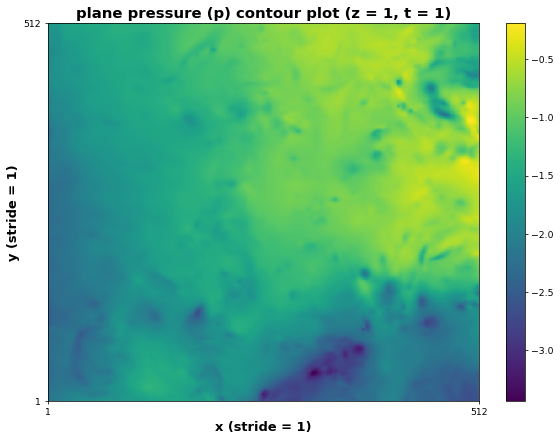

Contour plot created successfully.


In [6]:
"""
contour plot the data.
"""
from giverny.turbulence_gizmos.basic_gizmos import *

# user-defined parameters for creating a contour plot from the cutout data.
# -----
# plot ranges for the contour plot. all plot ranges should be inside of the cutout box that was processed above. note: one of the axis 
# ranges should be a single point, e.g. z_plot_range = [3, 3], since the contour plot is 2-dimensional.
x_plot_range = [1, 512]
y_plot_range = [1, 512]
z_plot_range = [1, 1]
# the index of the values to plot. e.g. 1 corresponds to the "ux" velocity component for the velocity data or the pressure magnitude for 
# the pressure data; 2 corresponds to the "uy" velocity component for the velocity data; etc. note: these indices are 1-based.
value_index = 1
# filename for the contour plot. the file will be saved in the output_path folder.
output_filename = 'turbulence_plane-contour_plot.png'

# use the contour plot gizmo.
# -----
# combine all of the plot axis ranges together for simplicity.
plot_ranges = assemble_axis_data([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
create_contour_plot(value_index, variable, cutout_data, plot_ranges, axes_ranges, strides,
                    output_path, output_filename)